C:\Users\suren\AppData\Local\Temp\ipykernel_17548\408715778.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')


RMSE: 5.300428794530379


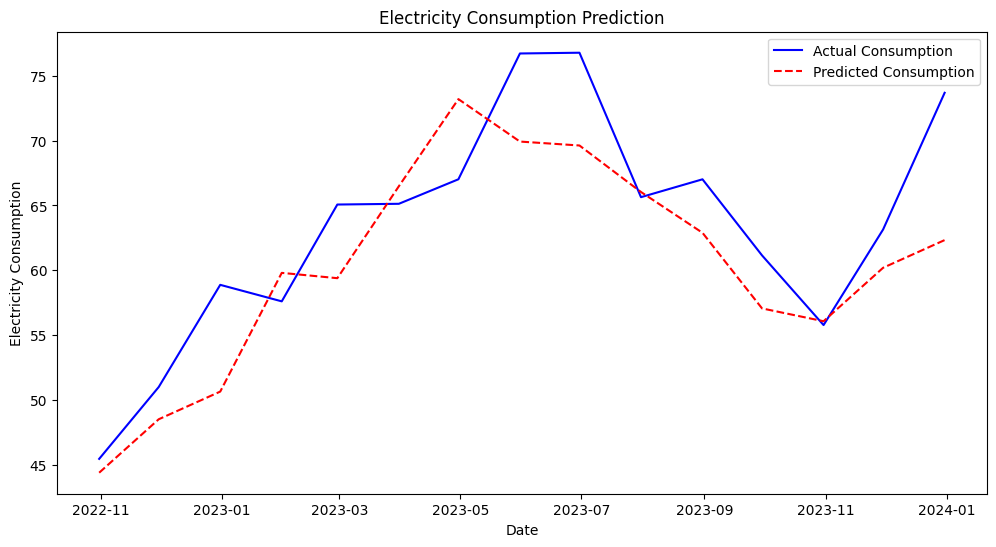

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

dates = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')
trend = np.arange(len(dates))
seasonality = 10 * np.sin(2 * np.pi * np.arange(len(dates)) / 12)
noise = np.random.normal(0, 5, len(dates))
electricity_consumption = trend + seasonality + noise

df = pd.DataFrame({'Date': dates, 'Consumption': electricity_consumption})

df['Time'] = np.arange(len(df))
df['Month'] = df['Date'].dt.month
df = pd.get_dummies(df, columns=['Month'], drop_first=True)

train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

X_train = train_data[['Time'] + [col for col in train_data.columns if 'Month' in col]]
y_train = train_data['Consumption']

model = LinearRegression()
model.fit(X_train, y_train)

X_test = test_data[['Time'] + [col for col in test_data.columns if 'Month' in col]]
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(test_data['Consumption'], y_pred))
print(f"RMSE: {rmse}")

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Consumption'], label='Actual Consumption', color='blue')
plt.plot(test_data['Date'], y_pred, label='Predicted Consumption', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption Prediction')
plt.legend()
plt.show()
